# Satistics for Data Science Practice Case - Iykra Week 3
This is practice case in week 3 at Data Science Fellowship IYKRA. I will answer some questions related dataset insurance company.  

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [26]:
df = pd.read_csv("insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Question 1: The shape of data is 1338 rows and 7 columns.

In [7]:
df.shape

(1338, 7)

**Our data consist of 1338 rows and 7 columns.**

## Question 2: These are the types of each data:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Question 3: Check missing value

df.isna().sum()

**There is no missing value in our data.**

## Question 4: These are statistical summary of numerical atributes:

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Question 5: Distribution of numerical atributes

**To check the distribution of numerical attributes / columns with continue number, we use seaborn to plot the distribution, 
while for discret we will plot the countplot.**

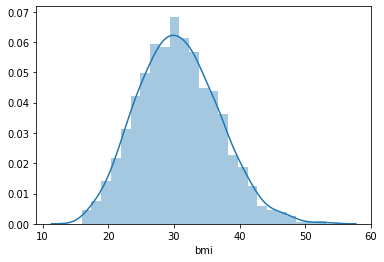

In [28]:
sns.distplot(df['bmi'])
plt.show()

**The distribution of bmi is tend to have normal and distribution.**

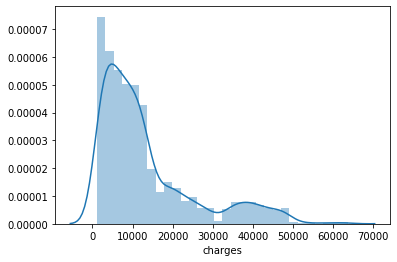

In [42]:
sns.distplot(df['charges'])
plt.show()

 **The distribution of charges is tend to have positive skewness / tail on the right.**

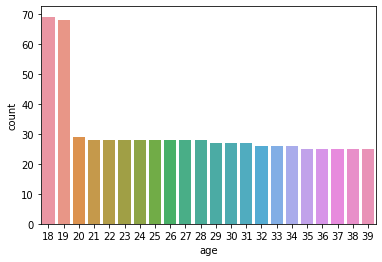

In [47]:
df_age = df[df['age']<=df['age'].mean()]
sns.countplot(df_age['age'])
plt.show()

**The age of customers is dominated by 18 and 19 years old.**

## Question 6: Skewness of numerical atributes

In [48]:
df['bmi'].skew()

0.2840471105987448

In [49]:
df['charges'].skew()

1.5158796580240388

**The result of the skewness value is same with our guess while we have plot of the distribution:  
bmi have distribution tend to normal distribution, the skewness value is 0.28 ~ 0.  
charges have tail on the right, the skewness value is 1.5 > 0.**

## Question 7: Check outliers

**We will crete function to figure out the lower outliers and upper outliers.  
lower outliers is the data points which come from below q1 - 1.5*(q3-q1)  
lower outliers is the data points which come from above q3 + 1.5*(q3-q1).**

In [132]:
def out(x):
    df1 = df[x]
    q1 = df1.quantile(0.25)
    q3 = df1.quantile(0.75)
    dn = q1-1.5*(q3-q1)
    up = q3+1.5*(q3-q1)
    up_out = df1[df1>up].shape[0]
    dn_out = df1[df1<dn].shape[0]
    print('The numbers of upper and lower outliers in {} is {} and {}'.format(x, up_out, dn_out))

In [133]:
out('bmi')

The numbers of upper and lower outliers in bmi is 9 and 0


In [134]:
out('age')

The numbers of upper and lower outliers in age is 0 and 0


In [136]:
out('charges')

The numbers of upper and lower outliers in charges is 139 and 0


## Hypothesis Testing
**We will check the statement: charges of people who smoke differ significantly from the people who don't.**  

First, we contruct the null and alternatif hypothesis.  
H0 : Mean of charges for smoker and nosmoker is the same  
H1 : Mean of charges for smoker and nosmoker is difference

In [57]:
df_smoker = df[df['smoker']=='yes']['charges']
df_nosmoker = df[df['smoker']=='no']['charges']

In [21]:
num = (df_smoker.mean()-df_nosmoker.mean())
den1 = ((len(df_smoker)-1)*df_smoker.var())+((len(df_nosmoker)-1)*df_nosmoker.var())
den2 = len(df_smoker)+len(df_nosmoker)-2
den3 = (1/len(df_smoker))+(1/len(df_nosmoker))

In [23]:
t_score = num/sqrt(den1*den2/den3)
t_score

0.00016030534424273492

**Confidence level 95%, t_score fall under the area of reject the H0.**   
**So, mean of charges for smoker and nosmoker is difference.**  